In [1]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

In [2]:
# JP2020-012952 Example 1
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

# Surface[1] = type=S radius=111.7037 thickness=5.5478 diameter = 69.87 nd = 1.7725 vd = 49.62
# Surface[2] = type=S radius=514.0093 thickness=0.15 diameter = 69.87 nd = 0 vd = 0
# Surface[3] = type=S radius=191.8963 thickness=1.5 diameter = 65.47 nd = 1.437 vd = 95.1
# Surface[4] = type=S radius=30.2492 thickness=12.0599 diameter = 49 nd = 0 vd = 0
# Surface[5] = type=S radius=423.9805 thickness=1.5 diameter = 51.84 nd = 1.437 vd = 95.1
# Surface[6] = type=S radius=50.8216 thickness=13.2984 diameter = 45.9 nd = 0 vd = 0
# Surface[7] = type=S radius=-38.1791 thickness=1.5 diameter = 45.9 nd = 1.64769 vd = 33.84
# Surface[8] = type=S radius=172.544 thickness=9.3857 diameter = 53.69 nd = 1.83481 vd = 42.72
# Surface[9] = type=S radius=-56.304 thickness=0.15 diameter = 53.69 nd = 0 vd = 0
# Surface[10] = type=S radius=-1641.6822 thickness=12.4672 diameter = 51.59 nd = 1.55032 vd = 75.5
# Surface[11] = type=S radius=-32.7021 thickness=1.5 diameter = 51.59 nd = 1.60342 vd = 38.01
# Surface[12] = type=S radius=246.8799 thickness=0.15 diameter = 52.48 nd = 0 vd = 0
# Surface[13] = type=S radius=83.2754 thickness=5.882 diameter = 51.07 nd = 1.7725 vd = 49.62
# Surface[14] = type=S radius=-377.0503 thickness=8.7665 diameter = 51.07 nd = 0 vd = 0
# Surface[15] = type=S radius=90.4416 thickness=5.3037 diameter = 51.07 nd = 1.92286 vd = 20.88
# Surface[16] = type=S radius=-527.4885 thickness=0.15 diameter = 51.07 nd = 0 vd = 0
# Surface[17] = type=S radius=55.6364 thickness=11.866 diameter = 46.89 nd = 1.59282 vd = 68.63
# Surface[18] = type=S radius=-44.6058 thickness=2.482 diameter = 46.89 nd = 1.58144 vd = 40.89
# Surface[19] = type=S radius=39.3845 thickness=7.3907 diameter = 36.5 nd = 0 vd = 0
# Surface[20] = type=AS radius=0 thickness=1.5 diameter = 33.213 nd = 0 vd = 0
# Surface[21] = type=S radius=84.0231 thickness=6.8887 diameter = 34.22 nd = 1.437 vd = 95.1
# Surface[22] = type=S radius=-32.202 thickness=1.5 diameter = 34.22 nd = 1.64769 vd = 33.84
# Surface[23] = type=S radius=66.2242 thickness=7.8613 diameter = 29.25 nd = 0 vd = 0
# Surface[24] = type=S radius=-26.9856 thickness=1.5 diameter = 29.25 nd = 1.62588 vd = 35.74
# Surface[25] = type=S radius=-121.029 thickness=0.15 diameter = 32.74 nd = 0 vd = 0
# Surface[26] = type=S radius=64.6922 thickness=6.7685 diameter = 34.35 nd = 1.59282 vd = 68.63
# Surface[27] = type=S radius=-40.8255 thickness=0.15 diameter = 34.35 nd = 0 vd = 0
# Surface[28] = type=S radius=-430.037 thickness=4.6315 diameter = 34.08 nd = 1.85135 vd = 40.1
# Aspheric values[28] = -430.037 0 -2.73662e-06 3.07519e-09 3.90515e-11 -1.94154e-14
# Surface[29] = type=S radius=-54.9865 thickness=39.0002 diameter = 34.08 nd = 0 vd = 0
# Aspheric values[29] = -54.9865 0 3.26804e-06 3.98767e-09 3.58258e-11 0

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Spherical(c=0.00895223089593927), interact_mode='transmit')
2 Surface(profile=Spherical(c=0.0019454912268073127), interact_mode='transmit')
3 Surface(profile=Spherical(c=0.005211156042856548), interact_mode='transmit')
4 Surface(profile=Spherical(c=0.03305872552001375), interact_mode='transmit')
5 Surface(profile=Spherical(c=0.002358596257851177), interact_mode='transmit')
6 Surface(profile=Spherical(c=0.019676672910730872), interact_mode='transmit')
7 Surface(profile=Spherical(c=-0.02619234083569283), interact_mode='transmit')
8 Surface(profile=Spherical(c=0.005795623145400593), interact_mode='transmit')
9 Surface(profile=Spherical(c=-0.017760727479397557), interact_mode='transmit')
10 Surface(profile=Spherical(c=-0.000609132108571707), interact_mode='transmit')
11 Surface(profile=Spherical(c=-0.030579075961482596), interact_mode='transmit')
12 Surface(profile=Spherical(c=0.004050550874918989), int

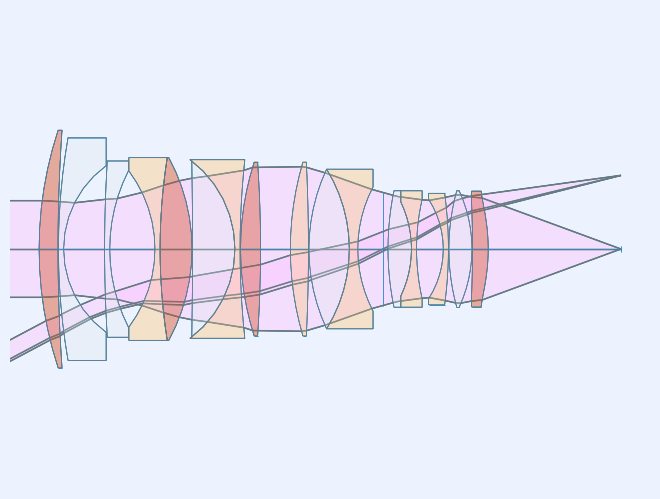

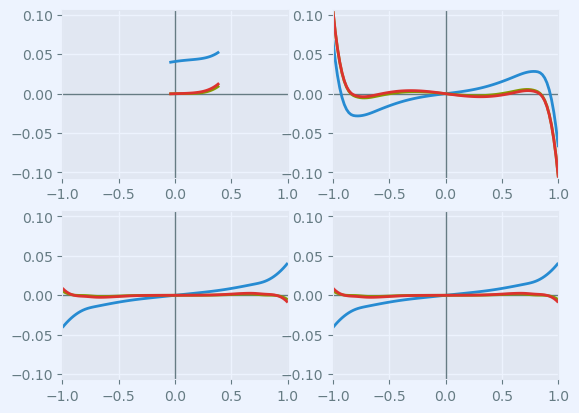

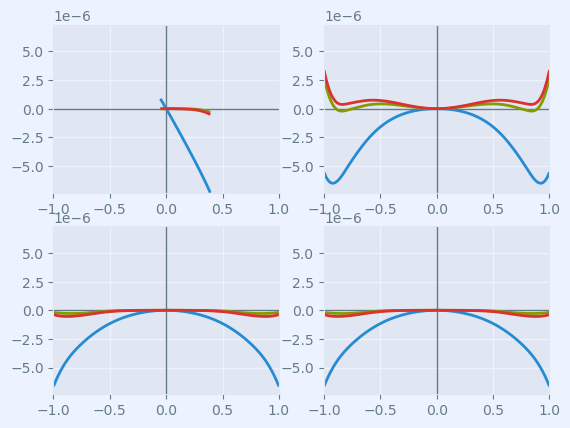

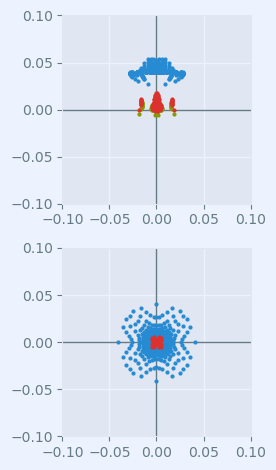

In [3]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=1.45)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 27.935])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'JP2020-012952 Example 1'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([111.704,5.5478,1.7725,49.62])
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([514.009,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([191.896,1.5,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 32.735
sm.add_surface([30.2492,12.0599])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([423.981,1.5,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 25.92
sm.add_surface([50.8216,13.2984])
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([-38.1791,1.5,1.64769,33.84])
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([172.544,9.3857,1.83481,42.72])
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-56.304,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-1641.68,12.4672,1.55032,75.5])
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([-32.7021,1.5,1.60342,38.01])
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([246.88,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.24
sm.add_surface([83.2754,5.882,1.7725,49.62])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-377.05,8.7665])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([90.4416,5.3037,1.92286,20.88])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-527.489,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([55.6364,11.866,1.59282,68.63])
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([-44.6058,2.482,1.58144,40.89])
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([39.3845,7.3907])
sm.ifcs[sm.cur_surface].max_aperture = 18.25
sm.add_surface([0,1.5])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 16.6065
sm.add_surface([84.0231,6.8887,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([-32.202,1.5,1.64769,33.84])
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([66.2242,7.8613])
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-26.9856,1.5,1.62588,35.74])
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-121.029,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 16.37
sm.add_surface([64.6922,6.7685,1.59282,68.63])
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-40.8255,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-430.037,4.6315,1.85135,40.1])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-430.037, cc=0,
        coefs=[0.0,-2.73662e-06,3.07519e-09,3.90515e-11,-1.94154e-14,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.add_surface([-54.9865,39.0002])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-54.9865, cc=0,
        coefs=[0.0,3.26804e-06,3.98767e-09,3.58258e-11,0,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(profile=Spherical(c=0.00895223089593927), interact_mode='transmit')
2 Surface(profile=Spherical(c=0.0019454912268073127), interact_mode='transmit')
3 Surface(profile=Spherical(c=0.005211156042856548), interact_mode='transmit')
4 Surface(profile=Spherical(c=0.03305872552001375), interact_mode='transmit')
5 Surface(profile=Spherical(c=0.002358596257851177), interact_mode='transmit')
6 Surface(profile=Spherical(c=0.019676672910730872), interact_mode='transmit')
7 Surface(profile=Spherical(c=-0.02619234083569283), interact_mode='transmit')
8 Surface(profile=Spherical(c=0.005795623145400593), interact_mode='transmit')
9 Surface(profile=Spherical(c=-0.017760727479397557), interact_mode='transmit')
10 Surface(profile=Spherical(c=-0.000609132108571707), interact_mode='transmit')
11 Surface(profile=Spherical(c=-0.030579075961482596), interact_mode='transmit')
12 Surface(profile=Spherical(c=0.004050550874918989), int

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air      dummy  1      1.0000
    1:   111.704000      5.54780      TAF1             1      34.935
    2:   514.009000     0.150000       air             1      34.935
    3:   191.896000      1.50000    FCD100             1      32.735
    4:    30.249200      12.0599       air             1      24.500
    5:   423.981000      1.50000    FCD100             1      25.920
    6:    50.821600      13.2984       air             1      22.950
    7:   -38.179100      1.50000     E-FD2             1      22.950
    8:   172.544000      9.38570    TAFD5F             1      26.845
    9:   -56.304000     0.150000       air             1      26.845
   10: -1641.680000      12.4672    FCD705             1      25.795
   11:   -32.702100      1.50000      E-F5             1      25.795
   12:   246.880000     0.150000       air             1      26.240
   13:    83.275400      5.88200     

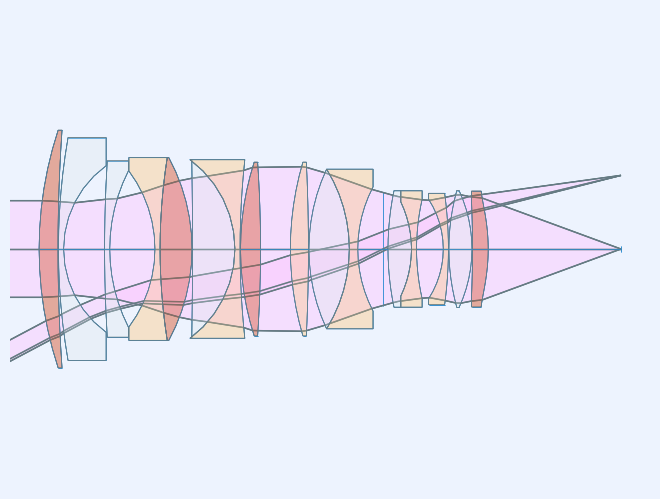

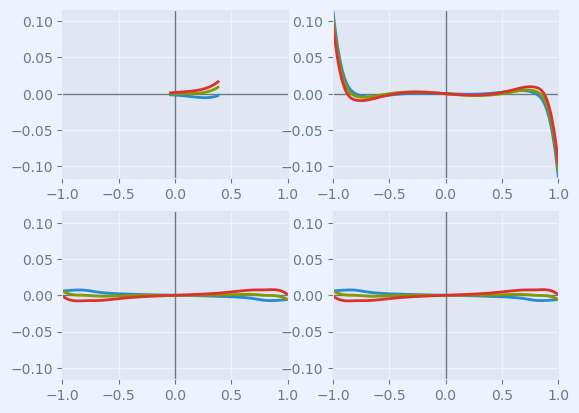

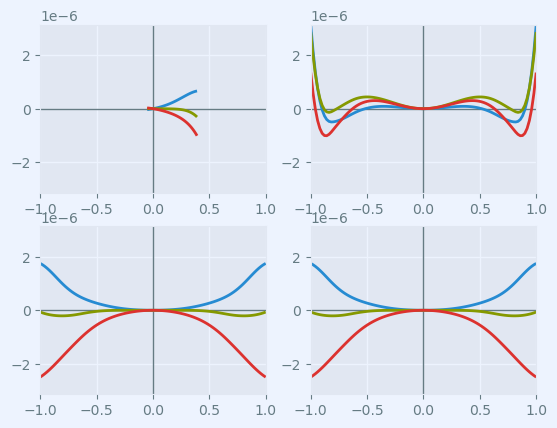

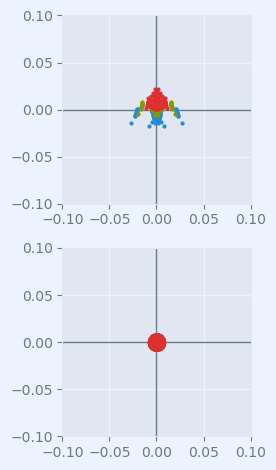

In [4]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=1.45)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 27.935])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'JP2020-012952 Example 1'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([111.704,5.5478,'TAF1','Hoya']) # 1.7725,49.62
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([514.009,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([191.896,1.5,'FCD100','Hoya'])  # 1.437,95.1
sm.ifcs[sm.cur_surface].max_aperture = 32.735
sm.add_surface([30.2492,12.0599])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([423.981,1.5,'FCD100','Hoya'])  # 1.437,95.1
sm.ifcs[sm.cur_surface].max_aperture = 25.92
sm.add_surface([50.8216,13.2984])
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([-38.1791,1.5,'E-FD2','Hoya'])       # 1.64769,33.84
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([172.544,9.3857,'TAFD5F','Hoya'])    # 1.83481,42.72
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-56.304,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-1641.68,12.4672,'FCD705', 'Hoya']) # 1.55032,75.5
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([-32.7021,1.5,'E-F5','Hoya'])        # 1.60342,38.01])
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([246.88,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.24
sm.add_surface([83.2754,5.882,'TAF1','Hoya'])       # 1.7725,49.62])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-377.05,8.7665])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([90.4416,5.3037,'E-FDS1','Hoya'])    # 1.92286,20.88
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-527.489,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([55.6364,11.866,'FCD515','Hoya'])    # 1.59282,68.63
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([-44.6058,2.482,'E-FL5','Hoya'])     # 1.58144,40.89])
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([39.3845,7.3907])
sm.ifcs[sm.cur_surface].max_aperture = 18.25
sm.add_surface([0,1.5])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 16.6065
sm.add_surface([84.0231,6.8887,'FCD100','Hoya'])    # 1.437,95.1
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([-32.202,1.5,'E-FD2','Hoya'])        # 1.64769,33.84
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([66.2242,7.8613])
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-26.9856,1.5,'E-F1','Hoya'])        # 1.62588,35.74
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-121.029,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 16.37
sm.add_surface([64.6922,6.7685,'FCD515','Hoya'])    # 1.59282,68.63
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-40.8255,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-430.037,4.6315,'M-TAFD305','Hoya'])   # 1.85135,40.1])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-430.037, cc=0,
        coefs=[0.0,-2.73662e-06,3.07519e-09,3.90515e-11,-1.94154e-14,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.add_surface([-54.9865,39.0002])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-54.9865, cc=0,
        coefs=[0.0,3.26804e-06,3.98767e-09,3.58258e-11,0,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()